In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get the critical imports out of the way
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')
from IPython.core.display import HTML 
# Center matplotlib figures...
HTML("""
<style>
.output_jpg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [ ]:
import os, glob
os.makedirs('speech_waveforms',exist_ok=True)
out_dir='/content/speech_waveforms'
data_dir='/content/drive/My Drive/berlin_speech/'
os.listdir(data_dir)

['anger']

In [ ]:
for folder in os.listdir(data_dir):
  print(os.listdir(os.path.join(data_dir,folder)))
  break

['ang(16).wav', 'ang(1).wav', 'ang(15).wav', 'ang(50).wav', 'ang(61).wav', 'ang(40).wav', 'ang(27).wav', 'ang(114).wav', 'ang(86).wav', 'ang(101).wav', 'ang(73).wav', 'ang(85).wav', 'ang(2).wav', 'ang(3).wav', 'ang(17).wav', 'ang(28).wav', 'ang(41).wav', 'ang(63).wav', 'ang(74).wav', 'ang(62).wav', 'ang(51).wav', 'ang(102).wav', 'ang(88).wav', 'ang(103).wav', 'ang(87).wav', 'ang(115).wav', 'ang(29).wav', 'ang(42).wav', 'ang(4).wav', 'ang(18).wav', 'ang(43).wav', 'ang(52).wav', 'ang(64).wav', 'ang(89).wav', 'ang(90).wav', 'ang(75).wav', 'ang(104).wav', 'ang(116).wav', 'ang(105).wav', 'ang(117).wav', 'ang(6).wav', 'ang(30).wav', 'ang(19).wav', 'ang(5).wav', 'ang(31).wav', 'ang(53).wav', 'ang(44).wav', 'ang(65).wav', 'ang(76).wav', 'ang(77).wav', 'ang(92).wav', 'ang(91).wav', 'ang(118).wav', 'ang(119).wav', 'ang(106).wav', 'ang(33).wav', 'ang(7).wav', 'ang(45).wav', 'ang(20).wav', 'ang(32).wav', 'ang(78).wav', 'ang(54).wav', 'ang(66).wav', 'ang(120).wav', 'ang(93).wav', 'ang(22).wav', 'an

In [ ]:
for folder in os.listdir(data_dir):
  os.makedirs(os.path.join(out_dir,folder))

In [ ]:
from matplotlib.colors import Normalize

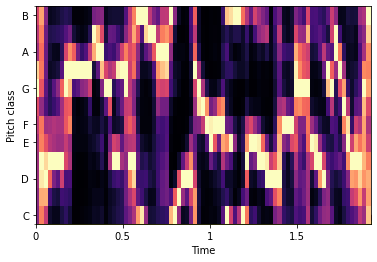

In [ ]:
for folder in os.listdir(data_dir):
  i=0
  for fil in os.listdir(os.path.join(data_dir,folder)):
    dir=os.path.join(data_dir,folder,fil)
    with soundfile.SoundFile(dir) as audio:
      waveform=audio.read(dtype="float32")
      sample_rate=audio.samplerate
      librosa.display.waveplot(waveform,sr=sample_rate)
      stft_spectrum_matrix = librosa.stft(waveform)
      librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_spectrum_matrix), ref=np.max),y_axis='log', x_axis='time')
      #print(i)
      plt.savefig(os.path.join(out_dir,folder,'spec{:04}.jpg'.format(i)))
      mfc_coefficients = librosa.feature.mfcc(waveform, sr=sample_rate, n_mfcc=40)
      librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
      plt.savefig(os.path.join(out_dir,folder,'mfcc{:04}.jpg'.format(i)))
      chromagram = librosa.feature.chroma_stft(waveform, sr=sample_rate)
      librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
      plt.savefig(os.path.join(out_dir,folder,'chroma{:04}.jpg'.format(i)))
      i+=1
    

In [ ]:
#@title Utility to zip and download a directory
#@markdown Use this method to zip and download a directory. For ex. a TB logs 
#@markdown directory or a checkpoint(s) directory.

from google.colab import files
import os

dir_to_zip = 'speech_waveforms' #@param {type: "string"}
output_filename = 'file.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>